In [1]:
from IPython.display import HTML
from matplotlib import style
from matplotlib import animation
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def find_nearest_centroid(centroids, point):
    centroids = np.asarray(centroids)
    dist_2 = np.sum((centroids - point)**2, axis=1)
    return np.argmin(dist_2)

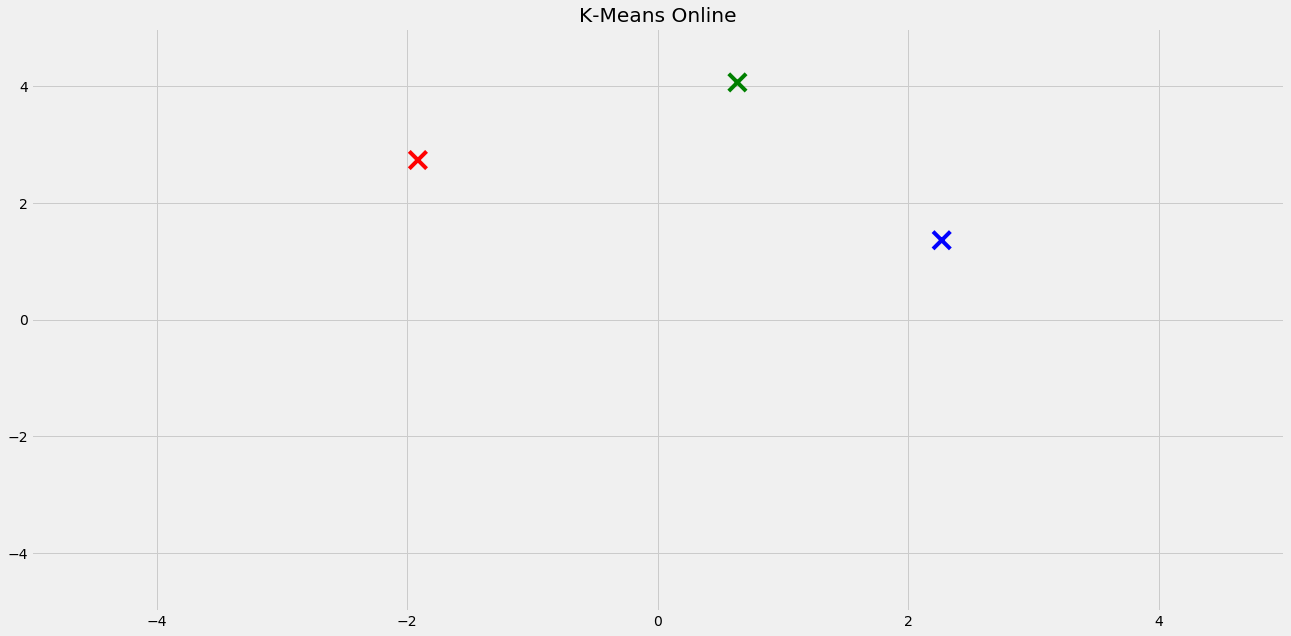

In [3]:
#Esta biblioteca me genera 100 puntos de 3 clusters distintos
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

#Los centroides se pueden elegir al azar
centroids = np.array([
                        [-4.0, 2.0], 
                        [0.0, 4.0], 
                        [2.0, 0.0]
                    ])

#Cantidad de puntos que hay en cada cluster
points_per_clusters = [0.0, 0.0, 0.0]

cluster_colors = ['red', 'green', 'blue']

style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
points_x = [] #coordenadas X de los puntos del stream
points_y = [] #coordenadas Y de los puntos del stream
colors = [] 

#La siguiente función se ejecutará 100 veces dentro de FuncAnimation (ver más abajo).
#En cada una de esas iteraciones tomaremos un punto de los que generamos "simulando" un stream
def animate(i):
    ax1.clear()
    ax1.set_title("K-Means Online")
    ax1.set_xlim([-5,5])
    ax1.set_ylim([-5,5])
    ax1.autoscale(enable=False)
    ax1.scatter(centroids[:,0].tolist(), centroids[:,1].tolist(), c = cluster_colors ,marker='x', s = 300)

    if i > 0:
        new_point = [X[i,0], X[i,1]]
        points_x.append(new_point[0])
        points_y.append(new_point[1])

        nearest_centroid = find_nearest_centroid(centroids, new_point)

        points_per_clusters[nearest_centroid]+=1

        colors.append(cluster_colors[nearest_centroid])

        #Debemos actualizar el centroide como cj = cj + 1 / |Nj| * (punto-cj)
        centroids[nearest_centroid] = centroids[nearest_centroid] + 1.0 / points_per_clusters[nearest_centroid] * (new_point-centroids[nearest_centroid])

        ax1.scatter(points_x,points_y, c = colors, marker='o', s = 300)
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
HTML(ani.to_jshtml())


Text(0.5, 1.0, 'Clusters originales')

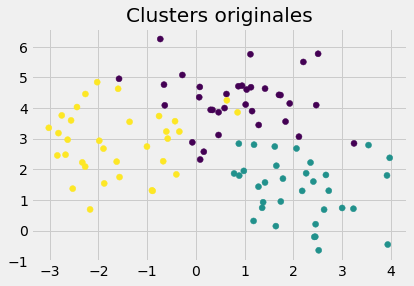

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Clusters originales")